<a href="https://colab.research.google.com/github/vasantbala/vb_ai_course/blob/main/neural_networks/projects/NN_BankChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Churn Prediction

## Objective
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Read the dataset

In [50]:
data = pd.read_csv('https://github.com/vasantbala/vb_ai_course/raw/main/neural_networks/projects/bank.csv')

In [51]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [53]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [54]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [55]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [56]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Observation
- RowNumber, CustomerId, Surnames columns can be dropped because these columns would help understand any pattern
- Geography has only 3 unique values. We could one hot encode it to convert it to a numerical column
- Gender has only 2 unique values. We could one hot encode it to convert it to a numerical column
- Other columns are either integer or float types with no Nan / null values and negative values. This gives a good impression on the data quality

### 2. Drop the columns which are unique for all users like IDs

In [57]:
# Preserve original data for further analysis
data_lean = data.copy(True)
# Removing RowNumber, CustomerId, Surnames columns because it won't help us understand any patterns
data_lean.drop('RowNumber', 1, inplace=True)
data_lean.drop('CustomerId', 1, inplace=True)   
data_lean.drop('Surname', 1, inplace=True)
data_lean.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 3. Perform bivariate analysis and give your insights from the same

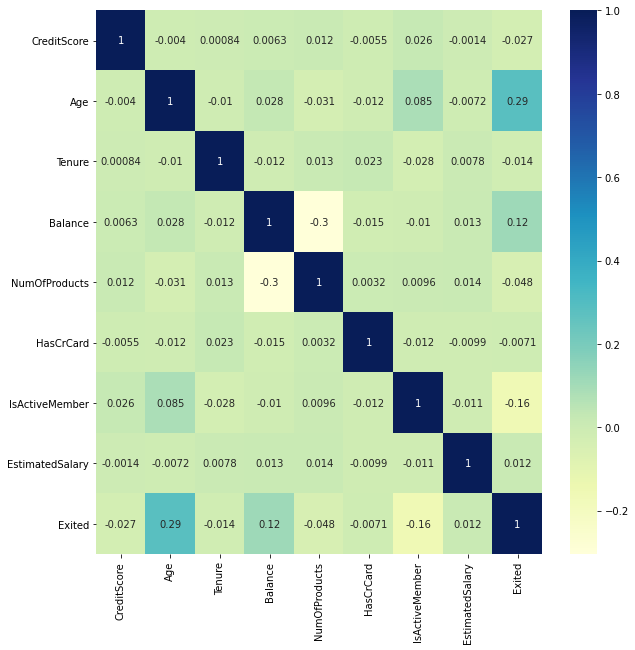

In [58]:
plt.figure(figsize=(10,10))
g=sns.heatmap(data_lean.corr(),annot=True,cmap="YlGnBu")

#### Observation
- Heat map on the correlation data shows that there NO strong positive or negative correlation with among the features

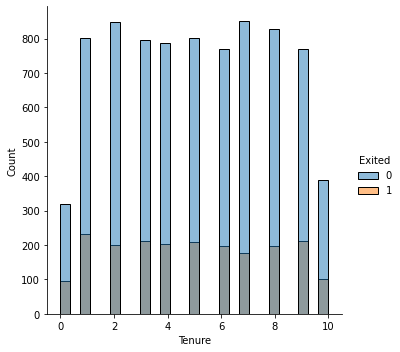

In [59]:
sns.displot(data_lean, x="Tenure", hue="Exited")

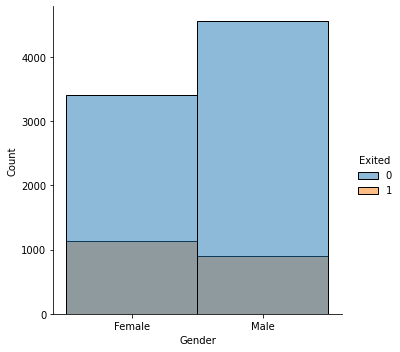

In [60]:
sns.displot(data_lean, x="Gender", hue="Exited")

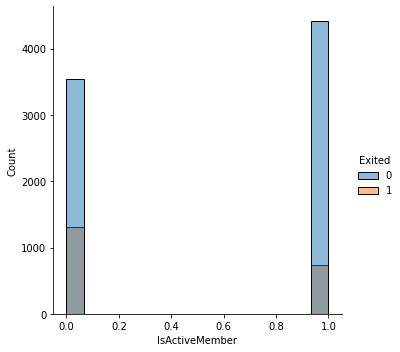

In [61]:
sns.displot(data_lean, x="IsActiveMember", hue="Exited")

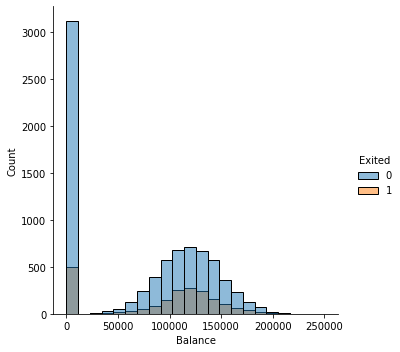

In [62]:
sns.displot(data_lean, x="Balance", hue="Exited")

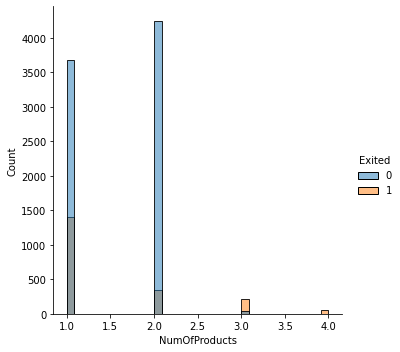

In [63]:
sns.displot(data_lean, x="NumOfProducts", hue="Exited")

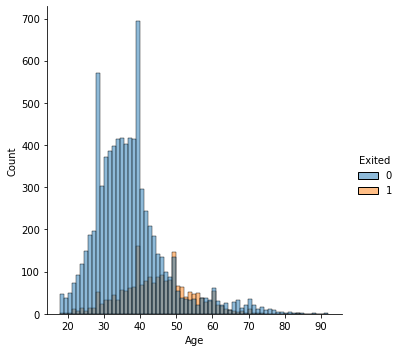

In [64]:
sns.displot(data_lean, x="Age", hue="Exited")

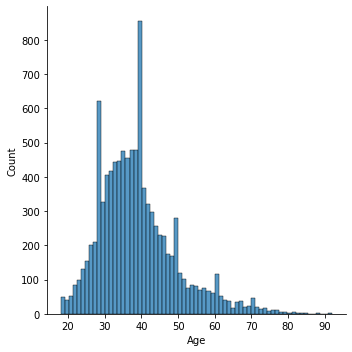

In [65]:
sns.displot(data_lean, x="Age")

## TODO

### 4. Distinguish the feature and target set and divide the data set into training and test sets

In [66]:
#Create a copy of data
data_encoded = data_lean.copy()
# One hot encode Geography and Gender columns
data_encoded = pd.get_dummies(data_encoded, prefix='Geo', columns=['Geography'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, prefix='Gender', columns=['Gender'], drop_first=True)
data_encoded

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_Germany,Geo_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [67]:
from sklearn.model_selection import train_test_split
# Target variable is 'Exited'
y = data_encoded['Exited']
X = data_encoded.drop('Exited', axis = 1)
#Split data into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 7)

In [68]:
# Convert Target train and test variable from series to array
y_train =  np.array(y_train)
y_test =  np.array(y_test)

### 5. Normalize the train and test data

In [69]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)
# Scale the train set
X_train = scaler.transform(X_train)
# Scale the test set
X_test = scaler.transform(X_test)

### 6. Initialize & build the model. Identify the points of improvement and implement the same

In [70]:
import warnings
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [71]:
ncols = X_train.shape[0]
# Initialize the constructor
model = Sequential()
# Add an first hidden layer 
model.add(Dense(20, activation='softmax', kernel_initializer='normal'))
# second hidden layer
model.add(Dense(10, activation='softmax', kernel_initializer='normal'))
# Add an output layer with one neuron 
model.add(Dense(1, activation = 'softmax'))

In [72]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',  metrics = ['accuracy'])

In [82]:
model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),batch_size=X_train.shape[0])

Epoch 1/50
1/1 [==============================] - 0s 280ms/step - loss: 0.3342 - accuracy: 0.8624 - val_loss: 0.3435 - val_accuracy: 0.8600
Epoch 2/50
1/1 [==============================] - 0s 48ms/step - loss: 0.3343 - accuracy: 0.8623 - val_loss: 0.3436 - val_accuracy: 0.8600
Epoch 3/50
1/1 [==============================] - 0s 41ms/step - loss: 0.3344 - accuracy: 0.8626 - val_loss: 0.3436 - val_accuracy: 0.8600
Epoch 4/50
1/1 [==============================] - 0s 41ms/step - loss: 0.3344 - accuracy: 0.8623 - val_loss: 0.3437 - val_accuracy: 0.8600
Epoch 5/50
1/1 [==============================] - 0s 41ms/step - loss: 0.3344 - accuracy: 0.8623 - val_loss: 0.3436 - val_accuracy: 0.8600
Epoch 6/50
1/1 [==============================] - 0s 45ms/step - loss: 0.3344 - accuracy: 0.8624 - val_loss: 0.3436 - val_accuracy: 0.8597
Epoch 7/50
1/1 [==============================] - 0s 44ms/step - loss: 0.3343 - accuracy: 0.8624 - val_loss: 0.3435 - val_accuracy: 0.8597
Epoch 8/50
1/1 [==========

#### Observation
- The above model resulted in a bad accurary of around 20%
- Lets try with higher epochs number

In [74]:
ncols = X_train.shape[0]
# Initialize the constructor
model = Sequential()
# Add an first hidden layer 
model.add(Dense(20, activation='softmax', kernel_initializer='normal'))
# second hidden layer
model.add(Dense(10, activation='softmax', kernel_initializer='normal'))
# Add an output layer with one neuron 
model.add(Dense(1, activation = 'softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy',  metrics = ['accuracy'])
model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),batch_size=32)

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.6381 - accuracy: 0.2096 - val_loss: 0.5599 - val_accuracy: 0.2017
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5514 - accuracy: 0.2090 - val_loss: 0.5167 - val_accuracy: 0.2017
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5188 - accuracy: 0.2093 - val_loss: 0.4986 - val_accuracy: 0.2017
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4990 - accuracy: 0.2048 - val_loss: 0.4826 - val_accuracy: 0.2017
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4808 - accuracy: 0.2043 - val_loss: 0.4649 - val_accuracy: 0.2017
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4691 - accuracy: 0.2089 - val_loss: 0.4481 - val_accuracy: 0.2017
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4426 - accuracy: 0.1996 - val_loss: 0.4339 - val_accuracy: 0.2017

#### Observation
- The above model still resulted in a bad accurary of around 20%
- Increasing the epochs number did not help
- Lets try with different activation method

In [75]:
ncols = X_train.shape[0]
# Initialize the constructor
model = Sequential()
# Add an first hidden layer 
model.add(Dense(6, activation='relu'))
# second hidden layer
model.add(Dense(6, activation='relu'))
# Add an output layer with one neuron 
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',  metrics = ['accuracy'])
model.fit(X_train,y_train, batch_size=32, epochs = 100, validation_data=(X_test,y_test))


Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.6760 - accuracy: 0.5894 - val_loss: 0.4951 - val_accuracy: 0.7997
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4708 - accuracy: 0.7981 - val_loss: 0.4476 - val_accuracy: 0.8127
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4547 - accuracy: 0.8030 - val_loss: 0.4270 - val_accuracy: 0.8233
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4221 - accuracy: 0.8187 - val_loss: 0.4164 - val_accuracy: 0.8313
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.8224 - val_loss: 0.4110 - val_accuracy: 0.8303
Epoch 6/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4029 - accuracy: 0.8287 - val_loss: 0.4065 - val_accuracy: 0.8273
Epoch 7/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4016 - accuracy: 0.8237 - val_loss: 0.4039 - val_accuracy: 0.8280

#### Observation
- Relu and sigmoid activation methods worked well for this model

### 7. Predict the results using 0.5 as a threshold

In [76]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print('Predicting the results using 0.5 th')
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Predicting the results using 0.5 th
[[1 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### 8. Print the Accuracy score and confusion matrix

In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix')
print(cm)

Confusion Matrix
[[2261  134]
 [ 286  319]]


In [81]:
print('Accuracy Score =', accuracy_score(y_test, y_pred))


Accuracy Score = 0.86
